Data Structures and Processing
Week3: NumPy, and Matplotlib

In [1]:
import numpy as np
from typing import Union

### Task 1: Custom NumPy Functions

Write down a function `heaviside` which takes a number (`int` or `float`) and returns 1 if it is positive, 0 otherwise.

In [2]:
from typing import Union

def heaviside(num: Union[int, float]):
    if num > 0:
        return 1
    else:
        return 0
pass

In [3]:
assert heaviside(0.1) == 1
assert heaviside(-0.1) == 0
assert heaviside(0) == 0
assert heaviside(4) == 1

At this point, your function `heaviside` will return a `ValueError` if a NumPy array is provided as an input to it.  We would like to extend this function so that it handles any `ndarray` whose dtype is `int` or `float`.

Extend the `heaviside` function to handle the `ndarray`.

In [4]:
# Your solution to extend the heaviside function to handle `ndarray` goes here.
def heaviside(num: Union[int, float, np.ndarray]):
  
    if isinstance(num, np.ndarray):
        return np.where(num > 0, 1, 0)
    else:
        return 1 if num > 0 else 0
pass

In [5]:
assert np.all(heaviside(np.array([-1.2, 0.2, 3])) == np.array([0, 1, 1]))

### Task 2: Aggregate Functions

There are a lot of aggregate functions available in NumPy. Some of the variable useful ones include: `np.sum`, `np.mean`, `np.std`, `np.max`, `np.min` and so on.  For a detailed explanation of the parameters these function take in, have a look at their documentation using `help`.

Write down a function `mean_squared_values` that takes an `ndarray` as an argument and returns the mean value of the squares of elements in it.

In [6]:
import numpy as np

def mean_squared_values(arr: np.ndarray) -> float:


    # Compute the squares of elements in the array
    squared_arr = np.square(arr)

    # Compute the mean value of the squared array
    mean_squared = np.mean(squared_arr)

    return mean_squared
pass

In [7]:
import numpy as np
x_utest = np.arange(10)
assert mean_squared_values(x_utest) == 28.5

### Task 3: I/O and Visualization

In this task, we plan to read a data to an `ndarray`, process it, visualize the processed data, and write down to a file.

#### Step 1: Reading Data From a File

Consider the file `data.txt` in the current directory, and read its content to an array named `arr`.

Write down a function `read_values` that takes a `CSV` file `filename` as an input and an `index` as a second argument, and returns the `index` column from the `CSV` file as a NumPy array. You can use either `np.loadtxt` or `pandas.read_csv` here.

In [8]:
import numpy as np

def read_values(filename, index_column):
    data = np.loadtxt(filename, delimiter=',', usecols=(index_column,))
    return data
pass


In [9]:
import numpy as np
first_five = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
assert np.allclose(read_values("data.txt", 0)[:5], first_five)

Use your function to read in values to two variables `x_values` and `y_values`.

In [10]:
# Using the read_values function to read x_values and y_values
x_values = read_values("data.txt", 0)
y_values = read_values("data.txt", 1)


In [11]:
first_five_x = np.array([-1.9142, -1.8918, -1.3978, -1.382, -1.2789])
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(x_values[:5], first_five_x)
assert np.allclose(y_values[:5], first_five_y)

### Step 2: Processing

At this point, we are choosing a simple only to demonstrate the processing before plotting.  The data read in does not reveal something useful because it is randomly generated.

The reader should see that any type of processing is possible at this step.

Let us say that we do not want to change the variable `x_values`, but we do want to process the `y_values` by applying an exponential function `np.exp` from the NumPy library.

In [12]:
import numpy as np

# Read in the values from the CSV file
x_values, y_values = read_values("data.txt", 0), read_values("data.txt", 1)

# Apply the exponential function to y_values
y_exp = np.exp(y_values)

# Verify that the first five values of y_exp match the expected values
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(y_exp[:5], np.exp(first_five_y))
pass

In [13]:
first_five_y = np.array([-0.7919, -0.0492, -1.5441, -0.087, -1.3767])
assert np.allclose(y_exp[:5], np.exp(first_five_y))

#### Step 3: Visualization

Take the `x_values` and `y_values` and plot them using `plt.plot`.  Given extra directive of `"bo"` to the plot command.

In [14]:
import matplotlib.pyplot as plt

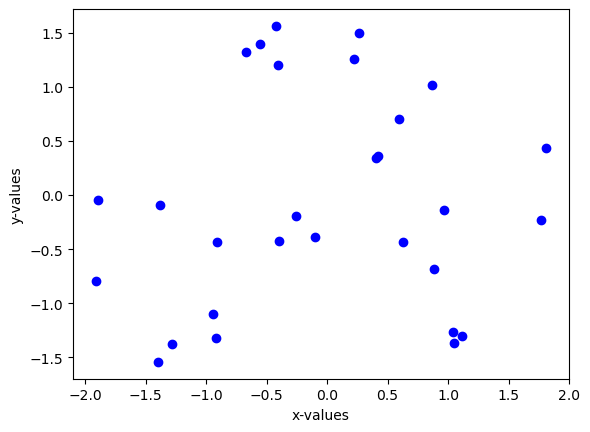

In [15]:
plt.plot(x_values, y_values, 'bo')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

#### Step 4: Writing Data to File

Write down a function `data_to_csv` that takes three arguments: `x_values`, `y_values` and `filename`, and writes down the arrays as a CSV file to `filename`.  The delimiter is `","`. You should use either `np.savetxt` of `DataFrame.to_csv` here.

In [16]:
import numpy as np
def data_to_csv(x_values: np.ndarray, y_values: np.ndarray, filename: str):
    
    # Create a numpy array of [x_values, y_values]
    data = np.column_stack((x_values, y_values))

    # Write the data to a CSV file
    np.savetxt(filename, data, fmt=["%f", "%f"], delimiter=',')

    return None
pass

In [17]:
data_to_csv(x_values, y_values, 'new_filename.txt')